# Project 2C: Monte Carlo Simulations 

## Part 1: Monte Carlo with log-normal process

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math 
from scipy import stats 
from scipy.stats import norm 

In [2]:
# Data
k = 10
r = 0.02
sig = 0.25
T = 0.25
t = 0.025
periods = int(T / t)
v = 0.0625
w = 0.0625
O = 3
xi = 0.1
s = 10
N = [10, 100, 1000, 10000]
calls = []
calls1 = []
E = []

In [3]:
# Stock Path Simulation
# Return Call Estimate
def sim1(n):
    sum_max = 0
    for i in range(n):
        Sn = stock_path(s)
        sum_max = sum_max + max(Sn - k, 0)
    return ((sum_max * math.exp(-1 * r * T)) / n)

In [4]:
# One Stock Path in Simulation
# Using eq: dS = rSdt + σSdz
def stock_path(S):
    for j in range(periods):
       S = S + S * ((r * t) + (sig * math.sqrt(t) * np.random.normal(0, 1)))
    return S

In [5]:
# Black-Scholes-Merton
def black_scholes():
    D1 = d1()
    D2 = d2(D1)
    call = s * norm.cdf(D1) - k * math.exp(-1 * r * T) * norm.cdf(D2)
    return call

In [6]:
# Black-Scholes Helper - d1
def d1():
    return (math.log(s / k) + (r + ((sig**2) / 2)) * T) / (sig * math.sqrt(T))


In [7]:
# Black-Scholes Helper - d2
def d2(d1):
    return d1 - sig * math.sqrt(T)

In [8]:
def plot(ln_n, ln_e): 
    plt.plot(ln_n, ln_e, 'o')
    a, b = np.polyfit(ln_n, ln_e, 1)
    plt.plot(ln_n, a * ln_n + b)
    print(f"The apparant convergence rate (-A): {a * -1}")

Monte Carlo vs. Black-Scholes-Merton

Type 		 Monte Carlo Solution 		 |E|
N=10 		 0.34975968674800734 		 0.17268564089562516

N=100 		 0.45846483696933255 		 0.06398049067429995

N=1000 		 0.5034725748503114 		 0.018972752793321113

N=10000 		 0.5271275039297476 		 0.004682176286115114

The apparant convergence rate (-A): 0.5228342615395564


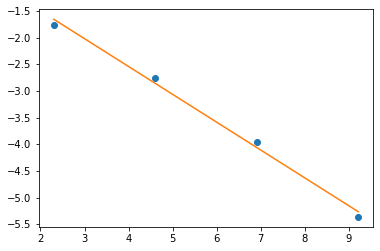

In [9]:
# Get Black-Scholes 
black = black_scholes()
# Get Monte Carlo Simulation Path 
for n in range(len(N)):
    call_est = sim1(N[n])
    calls.append(call_est)
    E.append(abs(call_est - black))
# Table 
print("Type \t\t Monte Carlo Solution \t\t |E|")
for i in range(len(N)):
    print(f"N={N[i]} \t\t {calls[i]} \t\t {E[i]}\n")
# Take LN for graphs 
ln_E = np.log(E)
ln_N = np.log(N)
# Plot
plot(ln_N, ln_E)



# Part 2: Monte Carlo Stochastic Volitility

In [10]:
# Stock Path Simulation 2
def sim2(n):
    sum_max = 0
    for i in range(n):
        Sn = stoch_path(s, v)
        sum_max = sum_max + max(Sn - k, 0)
    return ((sum_max * math.exp(-1 * r * T)) / n)


In [11]:
# Path: ito process
def stoch_path(S, V):
    for j in range(periods):
        V = v_delta(V)
        S = S + S * ((r * t) + (math.sqrt(V) * math.sqrt(t) * np.random.normal(0, 1)))
    return S

In [12]:
# v: stochastic process
# Return updated v
def v_delta(V):
    V = V + ((O * (w - V) * t) + (xi * math.sqrt(V) * math.sqrt(t) * np.random.normal(0, 1)))
    return V

Monte Carlo Simulation with Stochastic Volitility

In [13]:
for n in range(len(N)):
    call_est = sim2(N[n])
    calls1.append(call_est)
print("Type \t\t  Monte Carlo Simulation")
for i in range(len(N)):
    print(f"N={N[i]} \t\t {calls1[i]}")

Type 		  Monte Carlo Simulation
N=10 		 0.4289990357374577
N=100 		 0.5899016848387663
N=1000 		 0.49650171192994674
N=10000 		 0.5122314524372558
